In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import comb
import math

plt.rcParams["font.size"] = 16
plt.rcParams["axes.axisbelow"] = True

## 離散一様分布
---
### 概要
- $x=1,2,...,N$ となる確率が等しい.

### 質量関数
$$
\begin{align*}
p(x|N) = \frac{1}{N},\quad(x=1,2,...,N)
\end{align*}
$$

### 期待値
$$
\begin{align*}
\mathrm{E}[x] &= \sum_{x=1}^N x\frac{1}{N} \\
&= \frac{1}{N}\frac{N(N+1)}{2} \\
&= \frac{N+1}{2}
\end{align*}
$$

### 分散
$$
\begin{align*}
\mathrm{E}[x^2] &= \sum_{x=1}^N x^2\frac{1}{N} \\
&= \frac{1}{N}\frac{N(N+1)(2N+1)}{6} \\
&= \frac{(N+1)(2N+1)}{6}
\end{align*}
$$

$$
\begin{align*}
\mathrm{Var}[x] &= \mathrm{E}[x^2] - \mathrm{E}[x]^2 \\
&= \frac{(N+1)(2N+1)}{6} - \left(\frac{N+1}{2}\right)^2 \\
&= \frac{(N+1)(N-1)}{12}
\end{align*}
$$

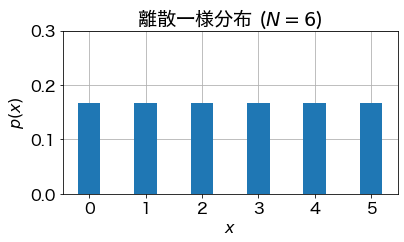

In [2]:
def descrete_uniform(N):
    return 1/N

N = 6
x = np.array([i for i in range(N)])
p_x = descrete_uniform(N)

plt.figure(figsize=(6, 3))
plt.bar(x.astype(str), p_x, width=0.4)
plt.title("離散一様分布 ($N=6$)")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.ylim(0, 0.3)
plt.grid()
plt.show()

## 二項分布
---

### 概要
- 成功確率 $\mu$ のベルヌーイ試行を独立に $N$ 回行った時の, **成功回数**の分布.

### 質量関数
$$
\begin{align*}
p(x|N,\mu) = \binom{N}{x}\mu^x(1-\mu)^{N-x},\quad(x=0,1,2,...,N)
\end{align*}
$$

### 期待値
$$
\begin{align*}
\mathrm{E}[x] &= \sum_{x=0}^N x\binom{N}{x}\mu^x(1-\mu)^{N-x} \\
&= \sum_{x=1}^N N\binom{N-1}{x-1}\mu\mu^{x-1}(1-\mu)^{(N-1)-(x-1)} \\
&= N\mu\sum_{x=1}^N \binom{N-1}{x-1}\mu^{x-1}(1-\mu)^{(N-1)-(x-1)} \\
&= N\mu
\end{align*}
$$

### 分散
$$
\begin{align*}
\mathrm{E}[x^2] &= \sum_{x=0}^N x^2\binom{N}{x}\mu^x(1-\mu)^{N-x} \\
&= \sum_{x=0}^N \lbrace{x(x-1)+x \rbrace} \binom{N}{x}\mu^x(1-\mu)^{N-x} \\
&= \sum_{x=0}^N {x(x-1)} \binom{N}{x}\mu^x(1-\mu)^{N-x} + \sum_{x=0}^N x \binom{N}{x}\mu^x(1-\mu)^{N-x} \\
&= \sum_{x=2}^N N(N-1) \binom{N-2}{x-2}\mu^2\mu^{x-2}(1-\mu)^{(N-2)-(x-2)} + \mathrm{E}[x] \\
&= N(N-1)\mu^2 + N\mu
\end{align*}
$$

$$
\begin{align*}
\mathrm{Var}[x] &= \mathrm{E}[x^2] - \mathrm{E}[x]^2 \\
&= N(N-1)\mu^2 + N\mu - (N\mu)^2 \\
& = N\mu(1-\mu)
\end{align*}
$$

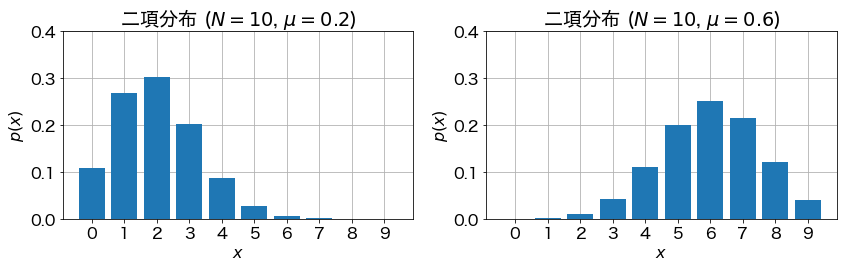

In [3]:
def binomial(x, N, mu):
    return np.array([comb(N, _x, exact=True)*(mu**_x)*(1-mu)**(N-_x) for _x in x])


param_l = [
    [10, 0.2], # N, mu
    [10, 0.6]
]

fig = plt.figure(figsize=(12, 4))
for i, (N, mu) in enumerate(param_l, 1):
    x = np.array([i for i in range(N)])
    p_x = binomial(x, N, mu)

    ax = plt.subplot(1, 2, i)
    ax.bar(x.astype(str), p_x, width=0.8)
    ax.set_title(f"二項分布 ($N={N}$, $\mu={mu}$)")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$p(x)$")
    ax.set_ylim(0, 0.4)
    ax.grid()

plt.tight_layout()
plt.show()

## ポアソン分布
---
### 概要
- **稀な現象**が起こる回数の分布.
- 二項分布において, $n\to\infty, p\to0$
- 平均と分散が等しい.

### 質量関数
$$
\begin{align*}
p(x|\lambda) = \frac{\lambda^x}{x!} e^{-\lambda}, \quad(x=0,1,2,...)
\end{align*}
$$

### 期待値
$$
\begin{align*}
\mathrm{E}[x] &= \sum_{x=0}^\infty x\frac{\lambda^x}{x!} e^{-\lambda} \\
&= \lambda e^{-\lambda} \sum_{x=1}^\infty \frac{\lambda^{x-1}}{(x-1)!} \\
&= \lambda e^{-\lambda} \sum_{x=0}^\infty \frac{\lambda^{x}}{x!} \\
&= \lambda e^{-\lambda} e^{\lambda} \\
&= \lambda
\end{align*}
$$

### 分散
$$
\begin{align*}
\mathrm{E}[x^2] &= \sum_{x=0}^\infty x^2\frac{\lambda^x}{x!} e^{-\lambda} \\
&= \sum_{x=0}^\infty \lbrace{x(x-1)+x\rbrace}\frac{\lambda^x}{x!} e^{-\lambda} \\
&= \sum_{x=0}^\infty x(x-1)\frac{\lambda^x}{x!} e^{-\lambda} + \sum_{x=0}^\infty x\frac{\lambda^x}{x!} e^{-\lambda} \\
&= \lambda^2 e^{-\lambda}\sum_{x=2}^\infty \frac{\lambda^{x-2}}{(x-2)!} + \mathrm{E}[x] \\
&= \lambda^2 e^{-\lambda}\sum_{x=0}^\infty \frac{\lambda^{x}}{x!} + \lambda \\
&= \lambda^2 e^{-\lambda} e^{\lambda} + \lambda \\
&= \lambda^2 + \lambda \\
\end{align*}
$$

$$
\begin{align*}
\mathrm{Var}[x] &= \mathrm{E}[x^2] - \mathrm{E}[x]^2 \\
&= \lambda^2 + \lambda - \lambda^2 \\
&= \lambda
\end{align*}
$$

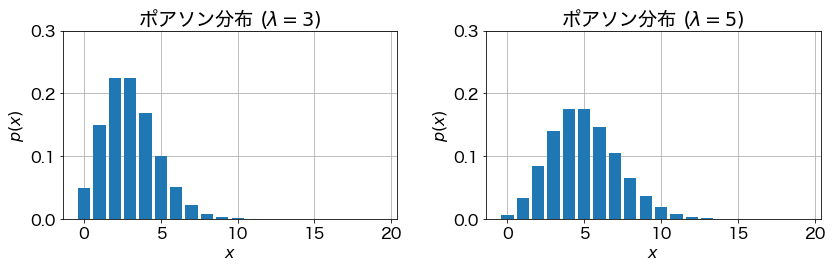

In [4]:
def poisson(x, lam):
    return (lam**x/np.vectorize(math.factorial)(x))*np.e**(-lam)

param_l = [3, 5]

fig = plt.figure(figsize=(12, 4))
for i, lam in enumerate(param_l, 1):
    x = np.array([i for i in range(20)])
    p_x = poisson(x, lam)

    ax = plt.subplot(1, 2, i)
    ax.bar(x, p_x, width=0.8)
    ax.set_title(f"ポアソン分布 ($\lambda={lam})$")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$p(x)$")
    ax.set_ylim(0, 0.3)
    ax.grid()

plt.tight_layout()
plt.show()

## 幾何分布
---
### 概要
- 成功確率 $\mu$ のベルヌーイ試行を独立に $N$ 回行った時の, **初めて成功するまでに要した失敗回数**の分布.

### 質量関数
$$
\begin{align*}
p(x|\mu) = \mu(1-\mu)^x,\quad(x=0,1,2,...)
\end{align*}
$$

### 期待値
$$
\begin{align*}
\mathrm{E}[x] &= \sum_{x=0}^\infty x\mu(1-\mu)^x \\
&= \mu\sum_{x=0}^\infty x(1-\mu)^x \\
\end{align*}
$$

ここで, $\frac{1}{1-x}$ のマクローリン展開を考える.

$$
\begin{align*}
\frac{1}{1-x} &= 1 + x + \frac{1}{2}x^2 + \frac{1}{3!}3!x^3 +... \\
&= 1 + x + x^2 + x^3 + ... \\
&= \sum_{k=0}^\infty x^k
\end{align*}
$$

両辺 $x$ で微分し, $x=1-\mu, k=x$ とすると,

$$
\begin{align*}
\frac{1}{(1-x)^2} &= \sum_{k=0}^\infty kx^{k-1} \\
\frac{1}{\mu^2} &= \sum_{x=0}^\infty x(1-\mu)^{x-1} \\
&= \frac{1}{1-\mu}\sum_{x=1}^\infty x(1-\mu)^{x} \\
\sum_{x=1}^\infty x(1-\mu)^{x} &= \frac{1-\mu}{\mu^2} \\
\end{align*}
$$

$$
\begin{align*}
\mathrm{E}[x] &= \mu\sum_{x=0}^\infty x(1-\mu)^x \\
&=  \mu\frac{1-\mu}{\mu^2} \\
&= \frac{1-\mu}{\mu}
\end{align*}
$$

### 分散
$\frac{1}{1-x}$ のマクローリン展開の結果について, もう一度両辺微分し,

$$
\begin{align*}
\frac{2}{(1-x)^3} &= \sum_{k=0}^\infty k(k-1)x^{k-2} \\
\end{align*}
$$

$x=1-\mu, k=x$ とすると,

$$
\begin{align*}
\frac{2}{\mu^3} &= \sum_{x=0}^\infty x(x-1)(1-\mu)^{x-2} \\
\frac{2(1-\mu)^2}{\mu^2} &= \sum_{x=0}^\infty x(x-1)\mu(1-\mu)^{x} \\
&= \mathrm{E}[x(x-1)]
\end{align*}
$$

となるので,

$$
\begin{align*}
\mathrm{Var}[x] &= \mathrm{E}[x^2] - \mathrm{E}[x]^2 \\
&= \mathrm{E}[x(x-1)] + \mathrm{E}[x] - \mathrm{E}[x]^2 \\
&= \frac{2(1-\mu)^2}{\mu^2} + \frac{1-\mu}{\mu} - \left\lbrace \frac{1-\mu}{\mu} \right\rbrace ^2 \\
&= \frac{1-\mu}{\mu^2}
\end{align*}
$$

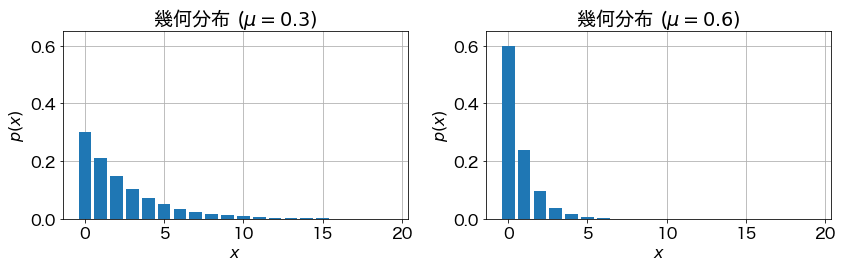

In [5]:
def geometric(x, mu):
    return mu*(1-mu)**x


param_l = [0.3, 0.6]

fig = plt.figure(figsize=(12, 4))
for i, mu in enumerate(param_l, 1):
    x = np.array([i for i in range(20)])
    p_x = geometric(x, mu)

    ax = plt.subplot(1, 2, i)
    ax.bar(x, p_x, width=0.8)
    ax.set_title(f"幾何分布 ($\mu={mu})$")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$p(x)$")
    ax.set_ylim(0, 0.65)
    ax.grid()

plt.tight_layout()
plt.show()

## 負の二項分布
---
### 概要
- 成功確率 $\mu$ のベルヌーイ試行について, **$r$ 回成功するまでに要した失敗回数**の分布.
- 合計 $r+x$ 回の試行のうち, 成功が $r$ 回, 失敗が $x$ 回となる.

### 質量関数
$$
\begin{align*}
p(x|r,\mu) = \binom{r+x-1}{x}\mu^r(1-\mu)^x,\quad(x=0,1,2,...)
\end{align*}
$$

### 期待値
$$
\begin{align*}
\mathrm{E}[x] =
\end{align*}
$$

### 分散
$$
\begin{align*}
\mathrm{Var}[x] =
\end{align*}
$$

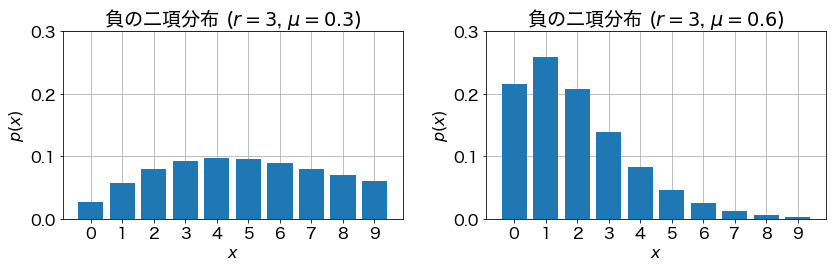

In [6]:
def neg_binomial(x, r, mu):
    return np.array([comb(r+_x-1, _x, exact=True)*(mu**r)*(1-mu)**_x for _x in x])


param_l = [
    [3, 0.3], # r, mu
    [3, 0.6]
]

fig = plt.figure(figsize=(12, 4))
for i, (r, mu) in enumerate(param_l, 1):
    x = np.array([i for i in range(10)])
    p_x = neg_binomial(x, r, mu)

    ax = plt.subplot(1, 2, i)
    ax.bar(x.astype(str), p_x, width=0.8)
    ax.set_title(f"負の二項分布 ($r={r}$, $\mu={mu}$)")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$p(x)$")
    ax.set_ylim(0, 0.3)
    ax.grid()

plt.tight_layout()
plt.show()

## 超幾何分布
---
### 概要
- $M$ 個の赤いボールと $N-M$ 個の白いボールが入っている壺の中から, $K$ 個のボールを無作為に**非復元抽出**した場合に含まれている赤いボールの個数の分布.

### 質量関数
$$
\begin{align*}
p(x|N,M,K) = \frac{\binom{M}{x}\binom{N-M}{K-x}}{\binom{N}{K}},\quad(x=0,1,2,...,K)
\end{align*}
$$

### 期待値
$$
\begin{align*}
\mathrm{E}[x] &= \sum_{x=0}^K x\frac{\binom{M}{x}\binom{N-M}{K-x}}{\binom{N}{K}} \\
&= \sum_{x=1}^K \frac{M\binom{M-1}{x-1}\binom{(N-1)-(M-1)}{(K-1)-(x-1)}}{\frac{N}{K}\binom{N-1}{K-1}} \\
&= K\frac{M}{N}\sum_{x=1}^K \frac{\binom{M-1}{x-1}\binom{(N-1)-(M-1)}{(K-1)-(x-1)}}{\binom{N-1}{K-1}} \\
&= K\frac{M}{N}
\end{align*}
$$

### 分散
$$
\begin{align*}
\mathrm{E}[x(x-1)] &= \sum_{x=0}^K x(x-1)\frac{\binom{M}{x}\binom{N-M}{K-x}}{\binom{N}{K}} \\
&= \sum_{x=2}^K \frac{M(M-1)\binom{M-2}{x-2}\binom{(N-2)-(M-2)}{(K-2)-(x-2)}}{\frac{N(N-1)}{K(K-1)}\binom{N-2}{K-2}} \\
&= K(K-1)\frac{M(M-1)}{N(N-1)}\sum_{x=2}^K \frac{\binom{M-2}{x-2}\binom{(N-2)-(M-2)}{(K-2)-(x-2)}}{\binom{N-2}{K-2}} \\
&= K(K-1)\frac{M(M-1)}{N(N-1)}
\end{align*}
$$

$$
\begin{align*}
\mathrm{Var}[x] &= \mathrm{E}[x(x-1)] + \mathrm{E}[x] - \mathrm{E}[x]^2 \\
&= K(K-1)\frac{M(M-1)}{N(N-1)} + K\frac{M}{N} - \left(K\frac{M}{N}\right)^2 \\
&= \frac{N-K}{N-1}\frac{M}{N}\frac{N-M}{N}K 
\end{align*}
$$

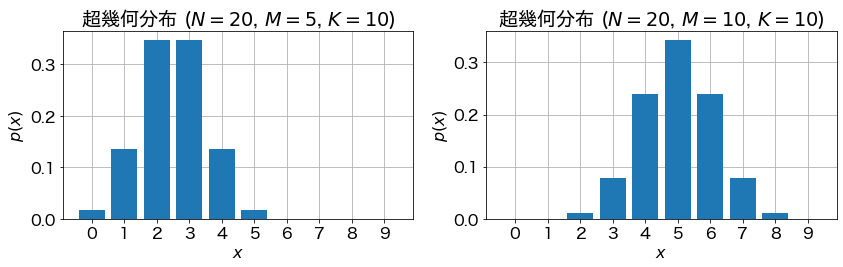

In [7]:
def hyper_geo(x, N, M, K):
    return np.array([comb(M, _x, exact=True)*comb(N-M, K-_x, exact=True)/comb(N, K, exact=True) for _x in x])


param_l = [
    [20, 5, 10], # N, M, K
    [20, 10, 10]
]

fig = plt.figure(figsize=(12, 4))
for i, (N, M, K) in enumerate(param_l, 1):
    x = np.array([i for i in range(10)])
    p_x = hyper_geo(x, N, M, K)

    ax = plt.subplot(1, 2, i)
    ax.bar(x.astype(str), p_x, width=0.8)
    ax.set_title(f"超幾何分布 ($N={N}$, $M={M}$, $K={K}$)")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$p(x)$")
    ax.grid()

plt.tight_layout()
plt.show()